In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-colorblind')

In [7]:
import json
import awkward as ak
import pathlib
data = ak.from_json(pathlib.Path("outputNewData0NOBIB.json"))




In [4]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label=""):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    else: data_flat = (data)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    plt.show()

    # a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label=""):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    plt.show()

In [5]:

def compare1DHistograms(datas,bins,scale='linear',label="",leg=[]):

    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 

        # handle data, there must be a smarter way to do this...
        if type(data[0])==np.int64   : data_flat=data
        elif type(data[0])==np.float32 : data_flat=data
        else : data_flat = ak.flatten(data, axis=None)
        counts, bins, bars = ax.hist(data_flat, bins, alpha=0.5, label=leg[i] if len(leg)>i else "")
        print(counts)
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title("1D Comparison between matched and truth muons (BIB)")
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.yscale(scale)
    plt.show()

[12. 52. 72. 61. 48. 55. 49. 51. 72. 65. 58. 57. 65. 58. 57. 65. 58. 63.
 49. 65. 70. 58. 56. 52. 59. 73. 53. 55. 51. 53. 54. 58. 52. 55. 71. 60.
 52. 56. 53. 59. 41. 65. 53. 52. 71. 66. 66. 50. 60.]
[ 0.  0.  0.  4.  5.  7.  4.  4.  7.  8.  8. 18. 10. 15. 13. 11. 17. 16.
 12. 14. 17.  6. 17. 13.  8. 17. 12. 12. 13. 14. 17. 19. 20. 17. 27. 24.
 24. 17. 13. 22. 18. 22. 19. 20. 23. 31. 24. 17. 26.]


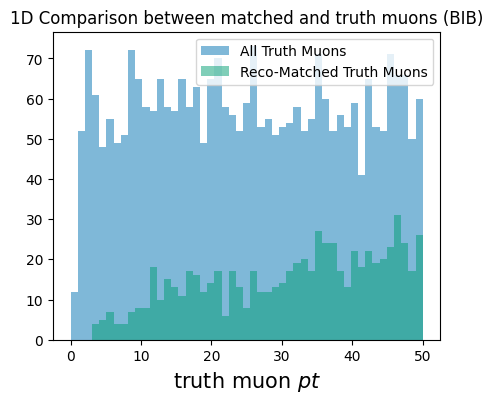

[  0.   0.   0.   0.   0.   3.  50.  62.  90. 129. 177. 198. 252. 319.
 292. 269. 253. 212. 175. 109.  83.  74.  56.   3.   0.   0.   0.   0.
   0.]
[ 0.  0.  0.  0.  0.  3. 42. 55. 76. 67. 26. 57. 23.  0. 28.  0.  4. 47.
 21. 65. 73. 66. 47.  2.  0.  0.  0.  0.  0.]


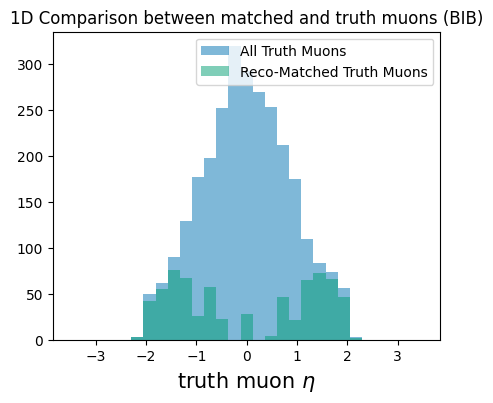

[  0.  50. 109. 111. 110. 101. 105. 107. 107. 117. 116. 101. 105. 100.
  88. 107. 106. 102. 127. 119. 119. 116. 111.  90. 100. 108. 112.  62.
   0.]
[ 0. 10. 22. 30. 20. 24. 31. 32. 29. 33. 31. 23. 28. 21. 22. 25. 26. 26.
 40. 23. 34. 23. 26. 24. 22. 37. 25. 15.  0.]


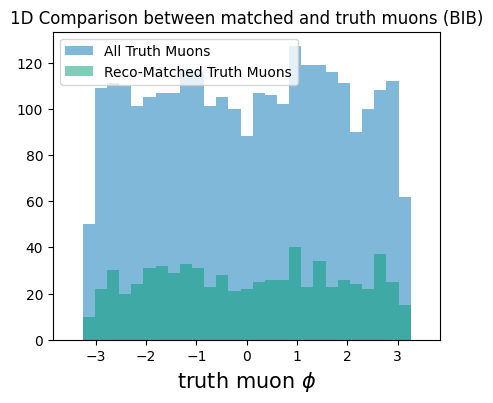

In [9]:
# Steps towards efficiency
import numpy as np


arrays = [data["mcp_pt"],data["mcp_mu_match_pt"]]




legend = [ "All Truth Muons","Reco-Matched Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(0,50,50), leg=legend, label=";truth muon $pt$")

legend = [ "All Truth Muons","Reco-Matched Truth Muons"]
compare1DHistograms([data["mcp_eta"],data["mcp_mu_match_eta"]], bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\eta$")

legend = [ "All Truth Muons","Reco-Matched Truth Muons"]
compare1DHistograms([data["mcp_phi"],data["mcp_mu_match_phi"]], bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\phi$")


In [20]:
import numpy as np
def plotEff(data1, data2,bins, scale='linear',label=""):
        fig = plt.figure(figsize=(5,4))
        ax = fig.add_subplot(111)
        data = ak.to_list(ak.flatten(data1, axis=None))
        d3 = ak.to_list(ak.flatten(data2, axis=None))
   
        x =  np.histogram(d3, bins)
        y1 = x[0]
        x3 = x[1]
        y1 = y1[:len(y1)]
        print(y1)
   
        x2 = np.histogram(data, bins)
        x1 = x2[1]
        y2 = x2[0]
        x1 = x1[:len(x1)-1]
        print(y2)
        arr = []
        for i in range(len(y2)):
                if y1[i] == 0:
                        y1[i] = 1
                z = float(y2[i])/y1[i]
                if z >= 1:
                        z = 1.0

                arr.append(z)

        

        error = np.sqrt(arr)/np.sqrt(50)
        wid = (max(bins)-min(bins))/len(bins)
        print(wid)

        
        ax.errorbar(x1, arr,error, marker='o',markersize='3', linestyle='')

      
        # handle labels
        title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
        xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
        ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
        
        ax.set_title("Reconstruction Efficency for V1 Muon Collider (NO-BIB)")
        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        plt.yscale(scale)
        plt.show()

[64 85 69 68 56 72 85 71 73 80 63 79 77 73 70 81 78 68 68 82 73 62 63 64
 77 63 67 86 70 68 64 63 75 68 60 90 78 68 73]
[ 0  1  8  7  5  6  9  9 20 16 14 16 19 19 18 17 12 19 16 15 17 13 13 18
 27 24 18 36 32 22 15 25 27 27 21 31 36 24 30]
1.225


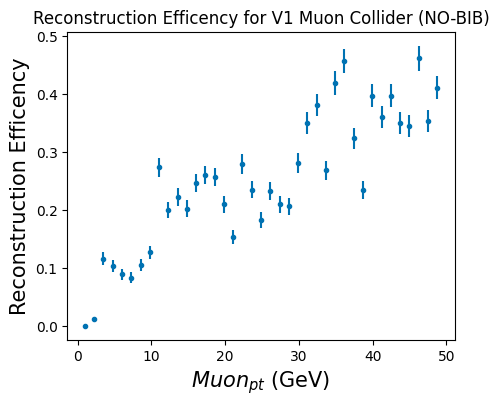

In [17]:
plotEff(data["mcp_mu_match_pt"],data["mcp_pt"],bins=np.linspace(1,50,40),label=";$Muon_{pt} $ (GeV);Reconstruction Efficency")

[67 55 60 59 53 64 63 61 68 50 58 50 59 55 51 49 58 52 60 56 53 68 66 67
 63 65 70 63 57]
[20 15 18 15 16 19 17 17 16 11 14 19  8 15 11 13 12 12 16 13 14 15 17 24
 11 17 22 13  9]
0.12666666666666665


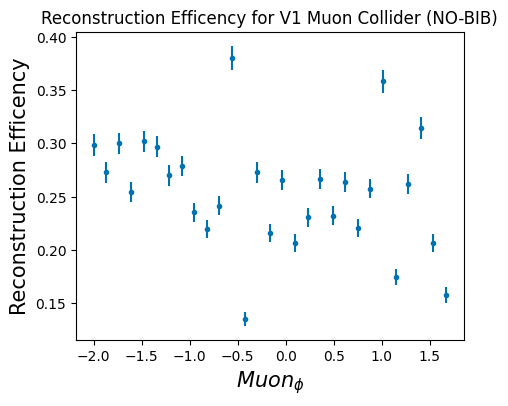

In [21]:
plotEff(data["mcp_mu_match_phi"],data["mcp_phi"],bins=np.linspace(-2,1.8,30),label=";$Muon_{\phi} $;Reconstruction Efficency")

[ 30  27  37  61  38  63  96  98 113 113 149 145 191 165 171 159 149 142
 146 128 112 100  73  58  53  49  43  40  28]
[26 23 34 49 33 35 30  4 42 31 29  0  0  0 28  0  0  0  7 28 33  4 19 38
 45 41 40 36 22]
0.13333333333333333


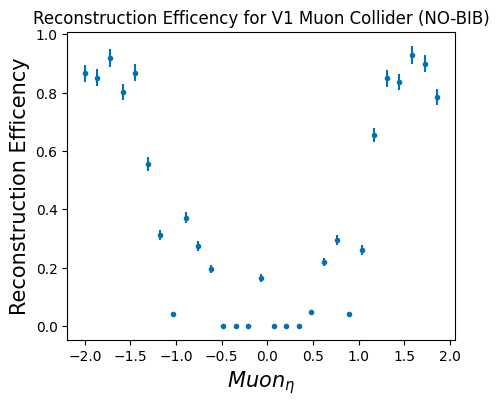

In [19]:
plotEff(data["mcp_mu_match_eta"],data["mcp_eta"],bins=np.linspace(-2,2,30),label=";$Muon_{\eta} $;Reconstruction Efficency")

[  0  73 134 111 133 110 131 115 103 140 141 116 148 119 114 139 146 113
 124 127 128 123 127 127 128 140 137  65   0]
[ 0 16 34 35 41 25 35 28 28 27 47 38 36 27 32 37 37 36 33 34 29 35 26 35
 29 30 36 16  0]
0.23333333333333334


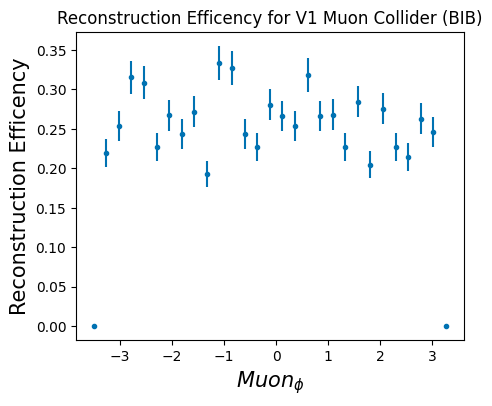

In [27]:
plotEff(al["mcp_mu_match_phi"],al["mcp_phi"],bins=np.linspace(-3.5,3.5,30),label=";$Muon_{\phi} $;Reconstruction Efficency")